# Implementing PyCaret 2.0 on Wine Quality Dataset (Highly Imbalance Classes Problem)

# **Since PyCaret 2.0 is recently launched, i plan to work with it and see if this is as amazing as it is hyped. To be honest i found it wonderful, they way it has reduced the work for data scientists and provide low code model to automate most of the repetition work is marvelous. Let start and see for yourself how it can save precious time for users.**

# **I've selected Wine Quality dataset due to its highly imbalance classes which is a key problem in dataset for incuring bias.**

In [1]:
#important libraries
import numpy as np 
import pandas as pd

**importing wine quality data from UCI ML repo via wget**

**wget: helps to retrieves content from web servers**

# 1. Importing Dataset and PyCaret 2.0

In [2]:
!wget --no-check-certificate \
    https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-08-04 05:15:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.05s   

2020-08-04 05:15:12 (1.56 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [3]:
df1 = pd.read_csv('/kaggle/working/winequality-red.csv', sep=";")

In [4]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**you can see for yourself how imbalance the classes are, target quality for class 4,8,3 are negligible as compared to 5,6,7. This will surely impact the model performace on minority classes and introduce bias**

In [6]:
df1.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**installing the latest version of PyCaret**

In [7]:
pip install pycaret==2.0

     |████████████████████████████████| 255 kB 575 kB/s eta 0:00:01
     |████████████████████████████████| 93 kB 679 kB/s eta 0:00:011
     |████████████████████████████████| 12.4 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 280 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 235 kB 29.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 1.9 MB/s  eta 0:00:01
  Created wheel for pyod: filename=pyod-0.8.1-py3-none-any.whl size=105651 sha256=468e9f3ee1062549c477b9f21277

**Since Problem is classification, you can read about other options here: [Modules](https://pycaret.org/modules/)**

In [8]:
from pycaret.classification import *

**The use case is simple you have to setup a preprocessing pipeline with 'setup' module, select the target and name your experiment.**

**you can specify a session_id, if you didn't by default a random seed is generated and returned in the Information grid. The unique number is then distributed as a seed in all functions used during the experiment. This can be used for later reproducibility of the entire experiment.**

# 2. Using Default Setup of PyCaret 2.0

In [9]:
session_1 = setup(df1, target = 'quality', session_id=123, log_experiment=False, experiment_name='wine_q1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(1599, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


**you can complete details about all functions here [1](https://pycaret.org/classification/)**

**compare_model(): This function train all the models available in the model library and scores them.**

**I blacklisted 'catboost' as it was taking much time in k-folds, you can test if it helps in accuracy and other metrics**

In [10]:
best_model = compare_models(blacklist=['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.6658,0.0000,0.3701,0.6409,0.6453,0.4541,0.4584,1.3902
1,Light Gradient Boosting Machine,0.6524,0.0000,0.3760,0.6256,0.6344,0.4388,0.4432,0.5277
2,Extreme Gradient Boosting,0.6435,0.0000,0.3752,0.6178,0.6274,0.4278,0.4306,0.6911
3,Random Forest Classifier,0.6426,0.0000,0.3728,0.6176,0.6267,0.4265,0.4296,0.3988
4,Gradient Boosting Classifier,0.6283,0.0000,0.3589,0.6082,0.6130,0.4013,0.4043,1.6138
5,Ada Boost Classifier,0.6024,0.0000,0.3498,0.5848,0.5854,0.3544,0.3586,0.9083
6,Linear Discriminant Analysis,0.5969,0.0000,0.2892,0.5741,0.5714,0.3352,0.3410,0.0364
7,Ridge Classifier,0.5880,0.0000,0.2509,0.4973,0.5318,0.2989,0.3103,0.0383
8,Logistic Regression,0.5853,0.0000,0.2602,0.5387,0.5411,0.3005,0.3098,0.2686
9,Naive Bayes,0.5657,0.0000,0.3083,0.5614,0.5588,0.3155,0.3183,0.0245


**models() provide list of models in library and their id that can be used in functions**

In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


# **creating 4 best model from default setup output and tuning them to see improvements**

In [12]:
#creating random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7232,0.0000,0.4492,0.7043,0.7069,0.5540,0.5629
1,0.6518,0.0000,0.3929,0.6264,0.6385,0.4395,0.4404
2,0.5893,0.0000,0.3009,0.5809,0.5831,0.3561,0.3574
3,0.6607,0.0000,0.4807,0.6330,0.6460,0.4586,0.4598
4,0.6696,0.0000,0.3212,0.6307,0.6468,0.4625,0.4658
5,0.6250,0.0000,0.3118,0.6057,0.6111,0.4059,0.4102
6,0.5625,0.0000,0.2925,0.5310,0.5442,0.3007,0.3030
7,0.6875,0.0000,0.3355,0.6467,0.6644,0.4926,0.4959
8,0.5982,0.0000,0.4472,0.5853,0.5826,0.3455,0.3490
9,0.6577,0.0000,0.3965,0.6319,0.6437,0.4500,0.4517


In [13]:
#creating Extra Trees Classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6696,0.0000,0.4026,0.6524,0.6572,0.4625,0.4652
1,0.6339,0.0000,0.3446,0.6266,0.6126,0.3912,0.3970
2,0.6607,0.0000,0.3298,0.6364,0.6465,0.4539,0.4567
3,0.6696,0.0000,0.4674,0.6287,0.6435,0.4610,0.4654
4,0.6607,0.0000,0.3010,0.6230,0.6329,0.4415,0.4480
5,0.7143,0.0000,0.3479,0.6794,0.6960,0.5434,0.5449
6,0.6518,0.0000,0.3291,0.6166,0.6302,0.4338,0.4381
7,0.7054,0.0000,0.3263,0.6663,0.6789,0.5182,0.5234
8,0.5982,0.0000,0.4387,0.6130,0.5775,0.3343,0.3413
9,0.6937,0.0000,0.4139,0.6670,0.6777,0.5015,0.5044


In [14]:
#light GBM Model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6607,0.0000,0.3987,0.6495,0.6495,0.4539,0.4600
1,0.6518,0.0000,0.3926,0.6205,0.6342,0.4335,0.4358
2,0.6161,0.0000,0.3028,0.5970,0.6013,0.3767,0.3826
3,0.6786,0.0000,0.4711,0.6403,0.6510,0.4733,0.4789
4,0.6429,0.0000,0.3269,0.6126,0.6253,0.4216,0.4241
5,0.6250,0.0000,0.3194,0.6079,0.6151,0.4132,0.4144
6,0.6518,0.0000,0.3451,0.6168,0.6269,0.4391,0.4479
7,0.6786,0.0000,0.3143,0.6328,0.6508,0.4797,0.4851
8,0.6339,0.0000,0.4695,0.6182,0.6191,0.4057,0.4088
9,0.6847,0.0000,0.4199,0.6603,0.6704,0.4917,0.4947


In [15]:
#creating XGB model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6429,0.0000,0.3991,0.6155,0.6287,0.4250,0.4260
1,0.6518,0.0000,0.3923,0.6241,0.6357,0.4387,0.4413
2,0.6161,0.0000,0.3122,0.6053,0.6068,0.3888,0.3925
3,0.6786,0.0000,0.4791,0.6402,0.6541,0.4774,0.4821
4,0.6161,0.0000,0.3158,0.5883,0.6016,0.3863,0.3873
5,0.6161,0.0000,0.3158,0.5950,0.6045,0.3987,0.3994
6,0.6696,0.0000,0.3526,0.6317,0.6464,0.4687,0.4742
7,0.6875,0.0000,0.3268,0.6534,0.6684,0.4997,0.5020
8,0.5536,0.0000,0.4292,0.5469,0.5408,0.2736,0.2766
9,0.7027,0.0000,0.4290,0.6779,0.6875,0.5210,0.5249


**You can witness how easy is to create model and CV it**

**Similarly, you can tune your model with best hyper params with just single line of code, isn't it amazing**

In [16]:
#Hyper params tuning via tune_model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6964,0.0000,0.4258,0.6772,0.6818,0.5061,0.5117
1,0.6875,0.0000,0.3904,0.6612,0.6670,0.4837,0.4882
2,0.6339,0.0000,0.3100,0.6103,0.6176,0.4055,0.4109
3,0.7054,0.0000,0.4821,0.6644,0.6765,0.5173,0.5233
4,0.6429,0.0000,0.3187,0.6198,0.6275,0.4226,0.4257
5,0.6786,0.0000,0.3329,0.6402,0.6582,0.4852,0.4872
6,0.6161,0.0000,0.3227,0.5829,0.5955,0.3778,0.3821
7,0.7054,0.0000,0.3259,0.6555,0.6757,0.5190,0.5246
8,0.5893,0.0000,0.4346,0.5618,0.5676,0.3264,0.3302
9,0.7117,0.0000,0.4425,0.6824,0.6961,0.5345,0.5363


**And you can see the params of your best model as well**

In [17]:
tuned_rf

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=7,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [18]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7054,0.0000,0.4297,0.6798,0.6898,0.5199,0.5228
1,0.6607,0.0000,0.3768,0.6339,0.6389,0.4384,0.4438
2,0.6696,0.0000,0.3239,0.6391,0.6500,0.4579,0.4622
3,0.6964,0.0000,0.4782,0.6620,0.6663,0.5003,0.5080
4,0.6429,0.0000,0.3020,0.6162,0.6195,0.4120,0.4176
5,0.7054,0.0000,0.3440,0.6658,0.6849,0.5283,0.5300
6,0.6339,0.0000,0.3300,0.6009,0.6126,0.4064,0.4119
7,0.6964,0.0000,0.3225,0.6521,0.6664,0.5005,0.5071
8,0.5357,0.0000,0.4041,0.5580,0.5117,0.2248,0.2302
9,0.7027,0.0000,0.4087,0.6977,0.6863,0.5084,0.5160


# **Plotting ROC for initial/basic model**

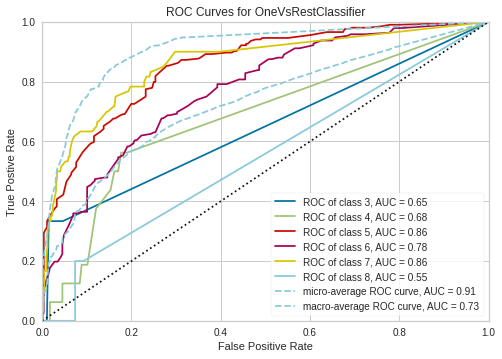

In [19]:
plot_model(rf)

# **Plotting ROC for hyper parameters tuned model**

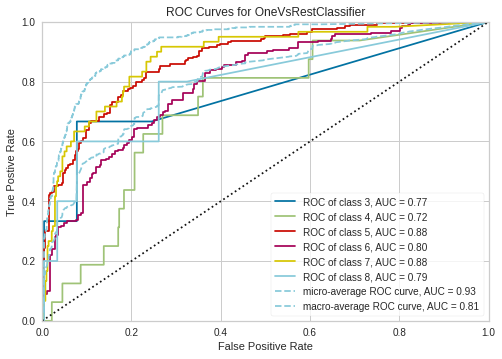

In [20]:
plot_model(tuned_rf)

# **This is an interesting way of seeing how our model create boundry and how it fits the space of features, below you can see our model is overfit**

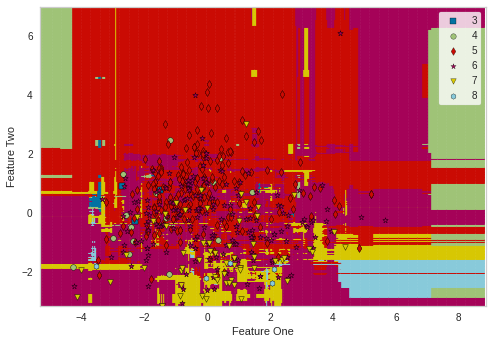

In [21]:
plot_model(rf, plot = 'boundary')

# **Do you see the difference in boundries of models (normal and tuned)**

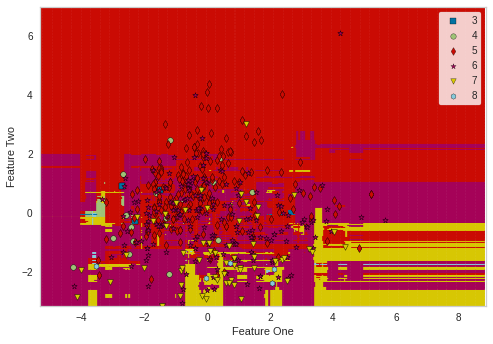

In [22]:
plot_model(tuned_rf, plot = 'boundary')

# 3. Oversampling to balance the classes

In [23]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

# **Here i have worked and tweaked some of the functions of the pipeline and try to balance the imbalance classes**

In [24]:
Session_2 = setup(df1, target = 'quality', session_id=177, log_experiment=False, 
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

Setup Succesfully Completed!


,Description,Value
0,session_id,177
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(1599, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


**You can several of the func are now shahed green because i will be envolving them in pipeline**

In [25]:
best_model1 = compare_models(blacklist=['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.6515,0.0000,0.3496,0.6383,0.6396,0.4443,0.4481,1.0652
1,Extra Trees Classifier,0.6497,0.0000,0.3097,0.6259,0.6309,0.4301,0.4349,1.4918
2,Light Gradient Boosting Machine,0.6461,0.0000,0.3306,0.6263,0.6305,0.4296,0.4336,1.2280
3,Gradient Boosting Classifier,0.6354,0.0000,0.3097,0.6278,0.6250,0.4168,0.4202,2.6186
4,Random Forest Classifier,0.6220,0.0000,0.3229,0.6041,0.6080,0.3951,0.3981,0.2860
5,Ada Boost Classifier,0.5818,0.0000,0.3097,0.5792,0.5724,0.3321,0.3356,1.1472
6,Quadratic Discriminant Analysis,0.5800,0.0000,0.2989,0.5601,0.5669,0.3260,0.3277,0.0245
7,Logistic Regression,0.5505,0.0000,0.2851,0.5619,0.5365,0.2852,0.2917,0.0973
8,K Neighbors Classifier,0.5478,0.0000,0.2949,0.5546,0.5470,0.3001,0.3029,0.0293
9,Linear Discriminant Analysis,0.5327,0.0000,0.2970,0.5685,0.5424,0.2861,0.2910,0.0377


In [26]:
xgboost_1 = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5804,0.0000,0.2934,0.5779,0.5770,0.3509,0.3525
1,0.7143,0.0000,0.5190,0.6892,0.6997,0.5423,0.5442
2,0.6161,0.0000,0.3024,0.5925,0.6033,0.3821,0.3833
3,0.6429,0.0000,0.3357,0.6235,0.6315,0.4335,0.4356
4,0.5625,0.0000,0.2513,0.5258,0.5382,0.2878,0.2917
5,0.6875,0.0000,0.3355,0.6545,0.6668,0.4932,0.4970
6,0.6161,0.0000,0.2915,0.6065,0.6075,0.3928,0.3967
7,0.6875,0.0000,0.4202,0.6574,0.6708,0.4918,0.4940
8,0.6786,0.0000,0.3381,0.6528,0.6632,0.4799,0.4830
9,0.6847,0.0000,0.3496,0.6662,0.6750,0.5003,0.5008


In [27]:
et_1 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6250,0.0000,0.3115,0.5935,0.6083,0.4003,0.4019
1,0.6786,0.0000,0.3170,0.6496,0.6573,0.4789,0.4857
2,0.6518,0.0000,0.2983,0.6211,0.6324,0.4321,0.4349
3,0.6161,0.0000,0.2996,0.6066,0.6033,0.3786,0.3829
4,0.6071,0.0000,0.2609,0.5535,0.5703,0.3508,0.3587
5,0.6429,0.0000,0.3179,0.6370,0.6317,0.4228,0.4267
6,0.6696,0.0000,0.3224,0.6561,0.6534,0.4689,0.4778
7,0.6518,0.0000,0.3188,0.6244,0.6351,0.4364,0.4398
8,0.6786,0.0000,0.3219,0.6724,0.6650,0.4733,0.4777
9,0.6757,0.0000,0.3377,0.6467,0.6588,0.4715,0.4739


In [28]:
lgbm_1 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.0000,0.3237,0.6221,0.6244,0.4242,0.4280
1,0.7054,0.0000,0.3443,0.6701,0.6832,0.5211,0.5259
2,0.6696,0.0000,0.3146,0.6345,0.6501,0.4627,0.4647
3,0.6250,0.0000,0.3034,0.6057,0.6113,0.3980,0.4014
4,0.5982,0.0000,0.2739,0.5554,0.5693,0.3382,0.3437
5,0.6518,0.0000,0.3048,0.6398,0.6313,0.4293,0.4352
6,0.6250,0.0000,0.2872,0.6063,0.6092,0.3991,0.4053
7,0.6696,0.0000,0.4215,0.6455,0.6558,0.4697,0.4719
8,0.6607,0.0000,0.4063,0.6437,0.6458,0.4551,0.4618
9,0.6847,0.0000,0.4016,0.6828,0.6831,0.5022,0.5024


In [29]:
gbc_1 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6250,0.0000,0.3197,0.6219,0.6231,0.4170,0.4178
1,0.6696,0.0000,0.3133,0.6676,0.6609,0.4740,0.4789
2,0.5893,0.0000,0.2735,0.5970,0.5904,0.3581,0.3607
3,0.5804,0.0000,0.2851,0.5677,0.5688,0.3234,0.3264
4,0.5982,0.0000,0.2658,0.5605,0.5710,0.3431,0.3487
5,0.6250,0.0000,0.3019,0.6182,0.6158,0.4023,0.4059
6,0.5804,0.0000,0.2605,0.5597,0.5625,0.3222,0.3266
7,0.6161,0.0000,0.3562,0.6042,0.6076,0.3857,0.3875
8,0.6429,0.0000,0.2984,0.6314,0.6268,0.4166,0.4216
9,0.6847,0.0000,0.3414,0.6722,0.6781,0.4995,0.5000


In [30]:
tuned_xgboost1 = tune_model(xgboost_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5804,0.0000,0.3015,0.5606,0.5694,0.3431,0.3440
1,0.6696,0.0000,0.4925,0.6397,0.6521,0.4708,0.4727
2,0.5804,0.0000,0.2698,0.5635,0.5712,0.3316,0.3325
3,0.6161,0.0000,0.3078,0.6040,0.6069,0.3864,0.3885
4,0.5804,0.0000,0.2670,0.5545,0.5583,0.3142,0.3188
5,0.6607,0.0000,0.3627,0.6600,0.6536,0.4566,0.4593
6,0.5893,0.0000,0.2724,0.5841,0.5828,0.3521,0.3551
7,0.6786,0.0000,0.4150,0.6569,0.6605,0.4808,0.4890
8,0.6161,0.0000,0.3126,0.6054,0.6058,0.3901,0.3946
9,0.6486,0.0000,0.3187,0.6427,0.6453,0.4455,0.4459


In [31]:
tuned_lgbm1 = tune_model(lgbm_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5893,0.0000,0.3052,0.5975,0.5910,0.3689,0.3704
1,0.6429,0.0000,0.4651,0.6275,0.6302,0.4332,0.4351
2,0.6429,0.0000,0.3228,0.6435,0.6420,0.4446,0.4456
3,0.6339,0.0000,0.3319,0.6207,0.6243,0.4146,0.4173
4,0.5804,0.0000,0.2748,0.5653,0.5643,0.3286,0.3353
5,0.6607,0.0000,0.4006,0.6605,0.6553,0.4636,0.4674
6,0.5446,0.0000,0.2547,0.5453,0.5398,0.2855,0.2891
7,0.7232,0.0000,0.4896,0.7050,0.7124,0.5549,0.5564
8,0.6518,0.0000,0.3361,0.6695,0.6580,0.4533,0.4550
9,0.6847,0.0000,0.4010,0.6844,0.6768,0.5019,0.5050


In [32]:
tuned_et1 = tune_model(et_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6518,0.0000,0.3306,0.6211,0.6353,0.4455,0.4473
1,0.6786,0.0000,0.3086,0.6492,0.6568,0.4794,0.4854
2,0.6339,0.0000,0.2911,0.6093,0.6193,0.4091,0.4108
3,0.5893,0.0000,0.2805,0.5821,0.5754,0.3326,0.3374
4,0.6071,0.0000,0.2690,0.5659,0.5734,0.3505,0.3592
5,0.6607,0.0000,0.3251,0.6470,0.6482,0.4537,0.4574
6,0.6339,0.0000,0.2826,0.6038,0.6084,0.4029,0.4121
7,0.6250,0.0000,0.3079,0.5987,0.6082,0.3928,0.3966
8,0.6339,0.0000,0.2949,0.6282,0.6167,0.3965,0.4017
9,0.6937,0.0000,0.3973,0.6901,0.6847,0.5044,0.5069


In [33]:
tuned_gbc1 = tune_model(gbc_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6250,0.0000,0.3197,0.6063,0.6151,0.4117,0.4126
1,0.6964,0.0000,0.4870,0.6709,0.6767,0.5083,0.5135
2,0.6429,0.0000,0.4580,0.6240,0.6308,0.4267,0.4293
3,0.5982,0.0000,0.2996,0.5846,0.5905,0.3648,0.3654
4,0.6161,0.0000,0.2728,0.5855,0.5881,0.3727,0.3808
5,0.5893,0.0000,0.2870,0.5755,0.5766,0.3439,0.3482
6,0.6339,0.0000,0.2910,0.6312,0.6168,0.4073,0.4169
7,0.6875,0.0000,0.4098,0.6618,0.6715,0.4922,0.4952
8,0.6607,0.0000,0.3304,0.6628,0.6532,0.4530,0.4587
9,0.6667,0.0000,0.3860,0.6605,0.6586,0.4647,0.4655


# **This function creates a Soft Voting(Majority Rule classifier) for the selected estimators in the model**

In [34]:
blend_soft = blend_models(estimator_list = [tuned_lgbm1, tuned_xgboost1, tuned_gbc1, tuned_et1], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.0000,0.3152,0.6126,0.6221,0.4190,0.4206
1,0.7232,0.0000,0.5067,0.7014,0.7043,0.5562,0.5628
2,0.6786,0.0000,0.3183,0.6504,0.6625,0.4807,0.4831
3,0.6250,0.0000,0.3200,0.6184,0.6176,0.4013,0.4042
4,0.5804,0.0000,0.2586,0.5422,0.5552,0.3169,0.3211
5,0.6339,0.0000,0.3131,0.6032,0.6122,0.4051,0.4108
6,0.6250,0.0000,0.2875,0.6130,0.6059,0.3921,0.4020
7,0.7143,0.0000,0.4327,0.6888,0.6983,0.5392,0.5433
8,0.6429,0.0000,0.3153,0.6226,0.6297,0.4232,0.4261
9,0.6667,0.0000,0.3424,0.6361,0.6508,0.4637,0.4648


**Check the ROC Curves w.r.t to default setup and check improvements**

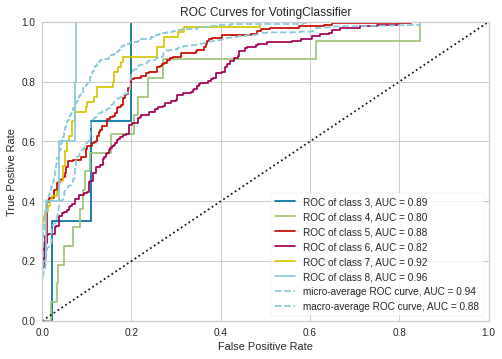

In [35]:
plot_model(blend_soft)

In [36]:
stacked_lgbm = stack_models(estimator_list = [tuned_lgbm1, tuned_xgboost1, tuned_gbc1, tuned_et1],
                           meta_model=lgbm_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6071,0.0000,0.3126,0.5981,0.6011,0.3875,0.3890
1,0.6875,0.0000,0.3371,0.6517,0.6657,0.4918,0.4956
2,0.6339,0.0000,0.3004,0.6036,0.6179,0.4099,0.4112
3,0.6339,0.0000,0.3150,0.6098,0.6191,0.4111,0.4138
4,0.5893,0.0000,0.2617,0.5394,0.5556,0.3225,0.3299
5,0.6518,0.0000,0.3048,0.6400,0.6310,0.4290,0.4354
6,0.5982,0.0000,0.2762,0.5740,0.5796,0.3497,0.3554
7,0.6607,0.0000,0.3393,0.6427,0.6499,0.4564,0.4585
8,0.6786,0.0000,0.3376,0.6553,0.6609,0.4812,0.4882
9,0.7297,0.0000,0.4116,0.7173,0.7198,0.5630,0.5650


# **Now Comparing best tuned model with blended model**

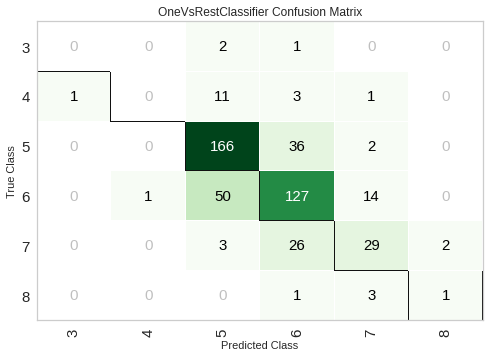

In [37]:
plot_model(lgbm_1, plot = 'confusion_matrix')

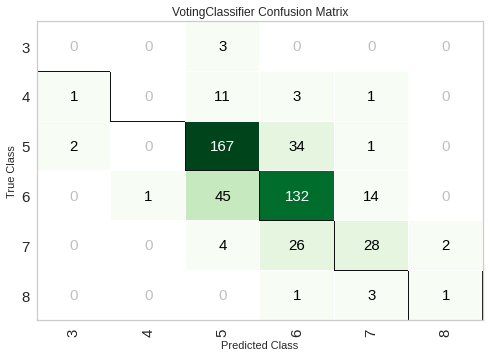

In [38]:
plot_model(blend_soft, plot = 'confusion_matrix')

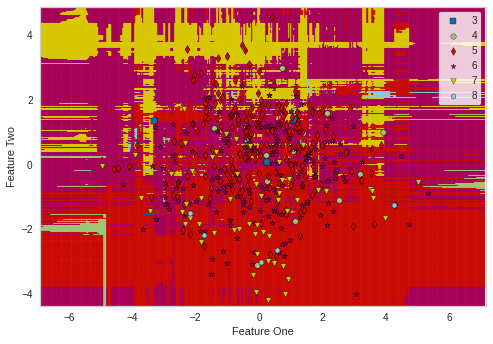

In [39]:
plot_model(blend_soft, plot = 'boundary')

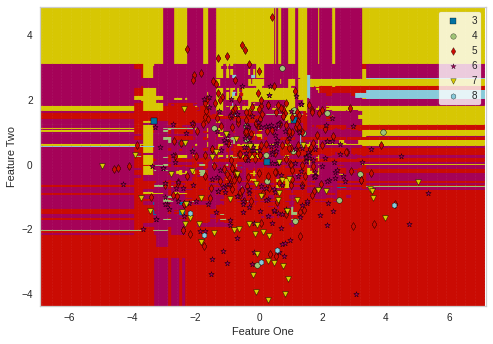

In [40]:
plot_model(lgbm_1, plot = 'boundary')

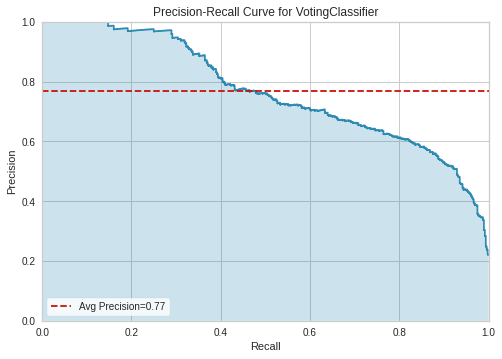

In [41]:
plot_model(blend_soft, plot = 'pr')

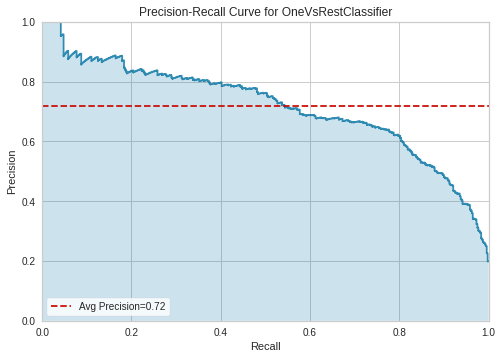

In [42]:
plot_model(lgbm_1, plot = 'pr')

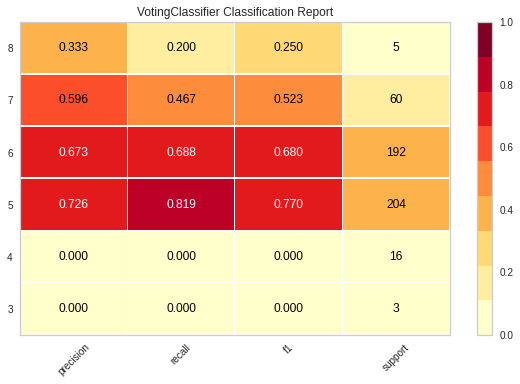

In [43]:
plot_model(blend_soft, plot = 'class_report')

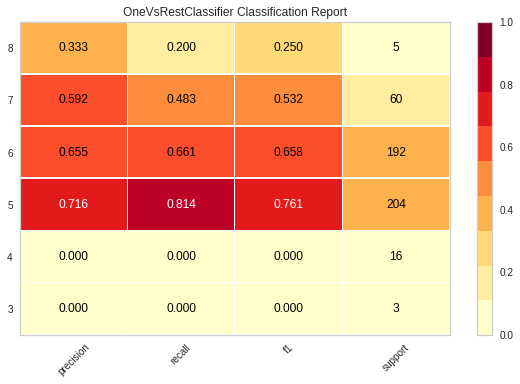

In [44]:
plot_model(lgbm_1, plot = 'class_report')

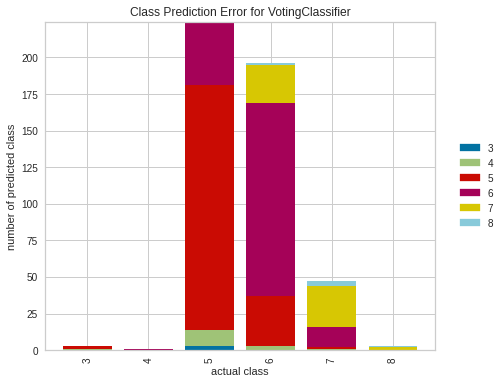

In [45]:
plot_model(blend_soft, plot = 'error')

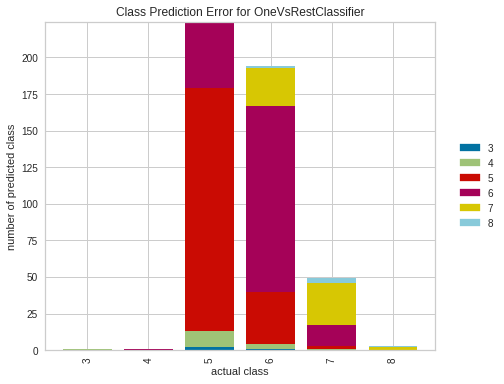

In [46]:
plot_model(lgbm_1, plot = 'error')

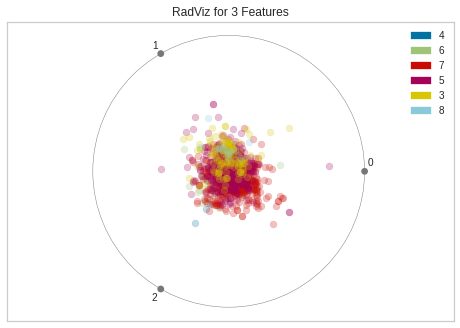

In [47]:
plot_model(lgbm_1, plot = 'dimension')

# **See, how we can play and tune our models within just few lines of code (given the knowlegde of models, math and paramters working) this will help automate most of the hectic work of data scientists.**

**Thanks for checking this notebook, you can contact me here for queries or at [LinkedIn](https://www.linkedin.com/in/muhammad-saad-31740060/)**